# Regression Models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('encoded_transformed_data.csv')

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df.drop('Unnamed: 0',axis = 1,inplace = True)
df.head()

,ageOfVehicle,powerPS,No_of_days_online,price,kilometer_Enc,vehicleType_Enc,fuelType_Enc,model_Enc,brand_Enc,state_Enc,CountryOfManufacture_Enc,notRepairedDamage_Yes,gearbox_manual
0,6.25,110,9,1500,13717.113297,7257.557082,9387.047740,7836.863228,9331.769749,6045.113979,7837.621484,1,1
1,4.08,102,10,2300,4377.947369,6549.068611,5521.009096,4790.353506,9331.769749,6749.729565,7837.621484,0,0
2,6.00,156,16,14850,22086.028674,3296.831296,5521.009096,7836.863228,4082.657025,5578.958919,3439.892074,0,1
3,17.92,84,0,1200,6982.800909,11398.950271,5521.009096,3673.857243,3580.063354,6391.086711,7837.621484,0,1
4,11.08,256,13,26800,8529.411508,10767.621387,5521.009096,23460.169675,35967.276176,7117.909115,7837.621484,0,1


In [3]:
df.shape

(245500, 13)

In [4]:
df.isnull().sum()

ageOfVehicle                0
powerPS                     0
No_of_days_online           0
price                       0
kilometer_Enc               0
vehicleType_Enc             0
fuelType_Enc                0
model_Enc                   1
brand_Enc                   0
state_Enc                   0
CountryOfManufacture_Enc    0
notRepairedDamage_Yes       0
gearbox_manual              0
dtype: int64

In [5]:
df.dropna(inplace = True)

# Parametric Models

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
X = df.drop('price',axis = 1)
y = pd.DataFrame(df['price'],columns=['price'])

In [7]:
y_par_mod = pd.DataFrame(np.log1p(y['price']).values,columns=['log_price'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y_par_mod,test_size = 0.2,random_state = 0)

In [9]:
lr = LinearRegression()
ridge = Ridge(alpha = 0.1,normalize = True) # Scaling is mandatory for all distance based calculations
lasso = Lasso(alpha = 0.0001,normalize = True)
elasticnet = ElasticNet(l1_ratio=0.01,alpha = 0.0001,normalize = True)

([<matplotlib.axis.YTick at 0x2060202ff08>,
 <a list of 20 Text yticklabel objects>)

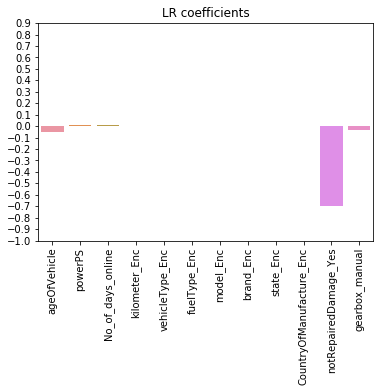

In [10]:
model = lr.fit(X_train,y_train)
sns.barplot(x = X_train.columns,y = model.coef_[0])
plt.title('LR coefficients')
plt.xticks(rotation = 90)
plt.yticks(np.arange(-1,1,0.1))

In [12]:
lr.score(X_test,y_test)

0.7341509340358445

In [37]:
pd.DataFrame(model.coef_,columns = X_train.columns)

,ageOfVehicle,powerPS,No_of_days_online,kilometer_Enc,vehicleType_Enc,fuelType_Enc,model_Enc,brand_Enc,state_Enc,CountryOfManufacture_Enc,notRepairedDamage_Yes,gearbox_manual
0,-0.053782,0.005416,0.008461,0.000084,0.000038,0.000093,0.000033,0.000011,0.000024,0.000053,-0.697563,-0.031214


([<matplotlib.axis.YTick at 0x1e53df16408>,
 <a list of 20 Text yticklabel objects>)

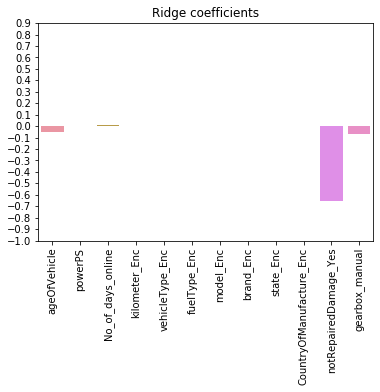

In [38]:
model = ridge.fit(X_train,y_train)
sns.barplot(x = X_train.columns,y = model.coef_[0])
plt.title('Ridge coefficients')
plt.xticks(rotation = 90)
plt.yticks(np.arange(-1,1,0.1))

([<matplotlib.axis.YTick at 0x1e53fe6a988>,
 <a list of 20 Text yticklabel objects>)

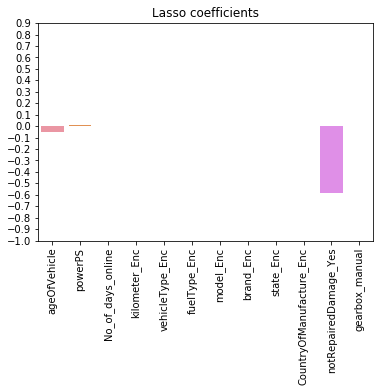

In [39]:
model = lasso.fit(X_train,y_train)
sns.barplot(x = X_train.columns,y = model.coef_)
plt.title('Lasso coefficients')
plt.xticks(rotation = 90)
plt.yticks(np.arange(-1,1,0.1))

([<matplotlib.axis.YTick at 0x1e53fefa6c8>,
 <a list of 20 Text yticklabel objects>)

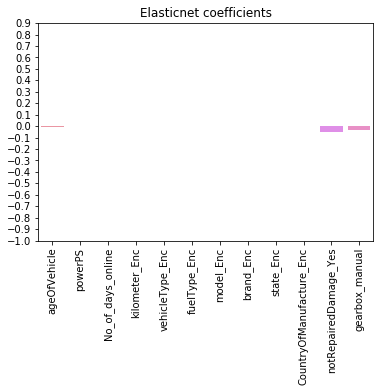

In [40]:
model = elasticnet.fit(X_train,y_train)
sns.barplot(x = X_train.columns,y = model.coef_)
plt.title('Elasticnet coefficients')
plt.xticks(rotation = 90)
plt.yticks(np.arange(-1,1,0.1))

In [41]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=10,shuffle=True,random_state=0)
for model,name in zip([lr,ridge,lasso,elasticnet],['Linear_Regression','Ridge','LASSO','ElasticNet']):
    rmse = []
    for train_idx,test_idx in kf.split(X,y_par_mod):
        X_train,X_test = X.iloc[train_idx,:],X.iloc[test_idx,:]
        y_train,y_test = y_par_mod.iloc[train_idx,:],y_par_mod.iloc[test_idx,:]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mse = metrics.mean_squared_error(y_test,y_pred)
        rmse.append(np.sqrt(mse))
    print('RMSE scores : %0.03f (+/- %0.08f) [%s]'%(np.mean(rmse), np.std(rmse,ddof = 1), name))
    print()

RMSE scores : 0.586 (+/- 0.00652309) [Linear_Regression]

RMSE scores : 0.588 (+/- 0.00621691) [Ridge]

RMSE scores : 0.596 (+/- 0.00613996) [LASSO]

RMSE scores : 1.047 (+/- 0.00700431) [ElasticNet]



RMSE scores : 0.586 (+/- 0.00652309) [Linear_Regression]

RMSE scores : 0.588 (+/- 0.00621691) [Ridge]

RMSE scores : 0.596 (+/- 0.00613996) [LASSO]

RMSE scores : 1.047 (+/- 0.00700431) [ElasticNet]

Linear model seems to give us the best results. But if we use Ridge model, we tend to increase the bias error by about 0.34% but would yeild us an improvement in variance error by approximately 4.69%. If we use Lasso model, we tend to increase the bias error by about 1.67% but would yeild us an improvement in variance error by approximately 5.87%.

### Ridge Model

In [50]:
np.mean(y_par_mod['log_price'])

8.261835079048764

In [73]:
np.expm1(8.261835079048764 + 0.588)

6972.23884208528

In [74]:
np.expm1(8.261835079048764 - 0.588)

2150.3161122047436

In [55]:
np.expm1(8.261835079048764 + 0.588 + 0.00621691)

7015.725877804344

In [56]:
np.expm1(8.261835079048764 + 0.588 - 0.00621691)

6929.021322705969

In [57]:
np.expm1(8.261835079048764 - 0.588 - 0.00621691)

2136.983061684644

In [58]:
np.expm1(8.261835079048764 - 0.588 + 0.00621691)

2163.732311295736

Worst case model range : 2136.98 euros to 7015.73 euros - 4878.75

Average case model range : 2150.32 euros to 6972.24 euros - 4821.92

Best case model range : 2163.73 euros to 6929.02 euros - 4765.29

# Scaling Data

In [188]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# Non Parametric Models

## Hyperparameter tuning

In [189]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
params = {
    'n_neighbors' : [1,5,10,20,30,40,50,60,70,80,90,100],
    'weights' : ['uniform','distance']
}
gscv = GridSearchCV(knn,params,scoring='neg_mean_squared_error',cv = 3)
gscv.fit(X_scaled,y)
print(gscv.best_params_)

{'n_neighbors': 10, 'weights': 'distance'}

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
param_dt = {
    'criterion' : ['mse','mae'],
    'max_depth' : np.arange(1,11)
}
param_rf = {
    'n_estimators' : [1,3,5,7,10],
    'max_depth' : np.arange(1,11)
}
gscv_dt = GridSearchCV(dt,param_dt,scoring='neg_mean_squared_error',cv = 3)
gscv_rf = GridSearchCV(rf,param_rf,scoring='neg_mean_squared_error',cv = 3)
gscv_dt.fit(X_scaled,y)
gscv_rf.fit(X_scaled,y)
print(gscv_dt.best_params_)
print(gscv_rf.best_params_)

{'criterion': 'mse', 'max_depth': 10}

{'max_depth': 10, 'n_estimators': 10}

In [192]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [193]:
knn = KNeighborsRegressor(n_neighbors= 10, weights= 'distance')
dt = DecisionTreeRegressor(max_depth = 10)
rf = RandomForestRegressor(max_depth = 10, n_estimators = 10)

In [194]:
#Tuning n_estimators for Bagging
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import KFold,cross_val_score
models = []
models.append(('KNN',knn))
models.append(('Decision Tree',dt))
for name,model in models:
    mse_var = []
    for val in np.arange(1,11):
        model_bag = BaggingRegressor(base_estimator = model,n_estimators = val,random_state = 0)
        kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
        results = cross_val_score(model_bag,X_scaled,y,cv = kfold,scoring='neg_mean_squared_error')
        mse_var.append(np.var(results,ddof = 1))
    print(name,np.argmin(mse_var)+1)

KNN 3

Decision Tree 2

In [195]:
#Tuning n_estimators for Boosting
from sklearn.ensemble import AdaBoostRegressor
models = []
models.append(('RF',rf))
models.append(('Decision Tree',dt))
for name,model in models:  
    mse_mean = []
    for val in np.arange(1,11):
        model_boost = AdaBoostRegressor(base_estimator = model,n_estimators = val,random_state = 0)
        kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
        results = cross_val_score(model_boost,X_scaled,y,cv = kfold,scoring='neg_mean_squared_error')
        mse_mean.append(np.mean(results))
    print(name,np.argmax(mse_mean)+1)

RF 8

Decision Tree 10

In [196]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
#Bagging Models
knn_bag = BaggingRegressor(base_estimator = knn,n_estimators = 3,random_state = 0)
DT_bag = BaggingRegressor(base_estimator = dt,n_estimators = 2,random_state = 0)
#Boosting models
rf_boost = AdaBoostRegressor(base_estimator = rf,n_estimators = 8,random_state = 0)
DT_boost = AdaBoostRegressor(base_estimator = dt,n_estimators = 10,random_state = 0)

In [197]:
#Tuning n_estimators for GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor
mse_mean = []
for val in np.arange(1,500):
    model_boost = GradientBoostingRegressor(n_estimators = val,random_state = 0)
    kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
    results = cross_val_score(model_boost,X_scaled,y,cv = kfold,scoring='neg_mean_squared_error')
    mse_mean.append(np.mean(results))
print(np.argmax(mse_mean)+1)

Gradient Boost no. of estimators : 235

In [198]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold,cross_val_score
GBR = GradientBoostingRegressor(n_estimators = 235,random_state = 0)

In [199]:
models = []
models.append(('DTree',dt))
models.append(('DTree Bagged',DT_bag))
models.append(('DTree Boosted',DT_boost))
models.append(('KNN',knn))
models.append(('KNN Bagged',knn_bag))
models.append(('RF',rf))
models.append(('RF Boosted',rf_boost))
models.append(('Gradient Boost',GBR))

DTree  :  3166.656666292124  --  20.688297393962202
DTree Bagged  :  3048.6105212780576  --  22.834231612754063
DTree Boosted  :  2920.243202345049  --  84.49880036135615
KNN  :  2902.0643393016458  --  21.264488151889246
KNN Bagged  :  2968.214229098139  --  12.085551507327446
RF  :  2874.4468242214257  --  44.693950897618045
RF Boosted  :  2810.063420003883  --  40.17073280040146
Gradient Boost  :  2728.8733868780087  --  32.40123373222216


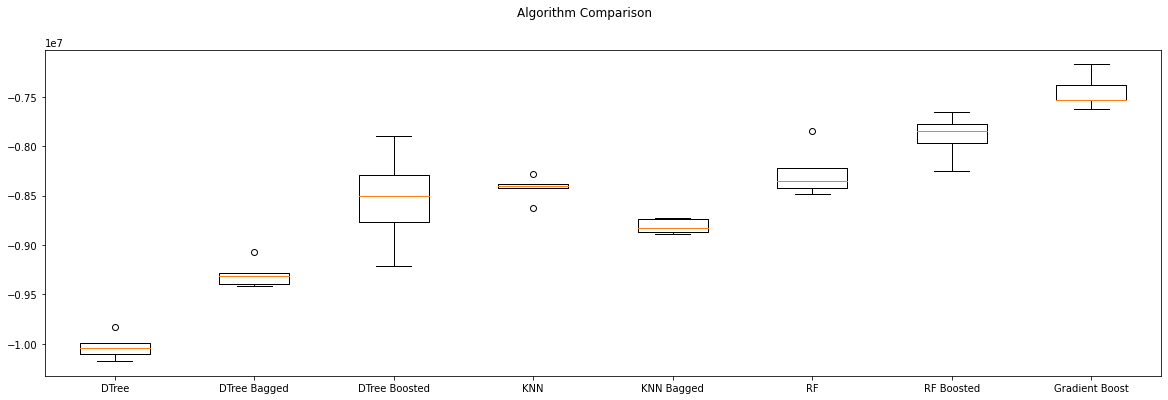

In [200]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
    cv_results = cross_val_score(model,X_scaled,y,cv = kfold,scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print(name,' : ',np.mean(np.sqrt(np.abs(cv_results))),' -- ',np.std(np.sqrt(np.abs(cv_results)),ddof = 1))

fig = plt.figure(figsize=(20,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* DTree  :  3166.656666292124  --  20.688297393962202
* DTree Bagged  :  3048.6105212780576  --  22.834231612754063
* DTree Boosted  :  2920.243202345049  --  84.49880036135615
* KNN  :  2902.0643393016458  --  21.264488151889246
* KNN Bagged  :  2968.214229098139  --  12.085551507327446
* RF  :  2874.4468242214257  --  44.693950897618045
* RF Boosted  :  2810.063420003883  --  40.17073280040146
* Gradient Boost  :  2728.8733868780087  --  32.40123373222216

Gradient boost model seems to give us the best results. But if we use knn bagged model, we tend to increase the bias error by about 8% but would yeild us an improvement in variance error by approximately 62%

DTree  :  0.8449657928744093
DTree Bagged  :  0.8563115350229993
DTree Boosted  :  0.8681219220876164
KNN  :  0.8698168777240948
KNN Bagged  :  0.8638136745699165
RF  :  0.8721904277046238
RF Boosted  :  0.8778941513969005
Gradient Boost  :  0.8848697399665386


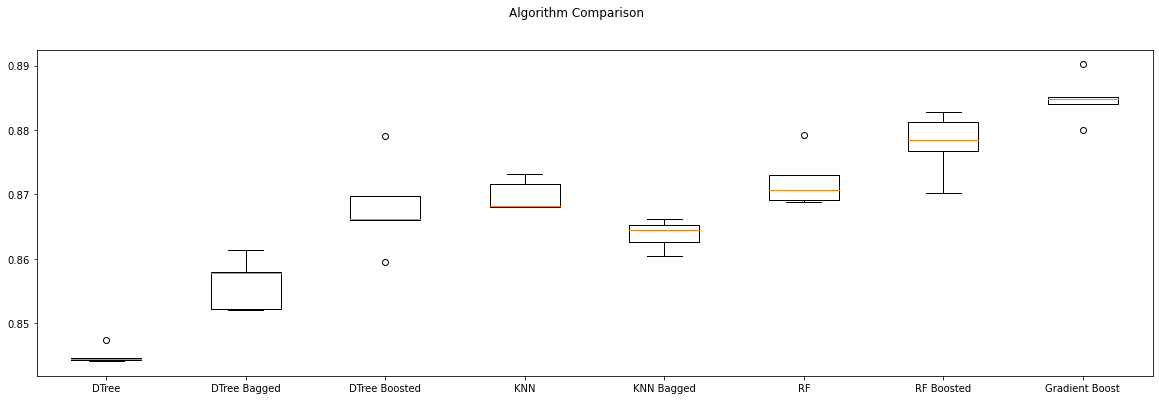

In [201]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
    cv_results = cross_val_score(model,X_scaled,y,cv = kfold,scoring='r2')
    results.append(cv_results)
    names.append(name)
    print(name,' : ',np.mean(cv_results))

fig = plt.figure(figsize=(20,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Rsquare
* DTree  :  0.8449657928744093
* DTree Bagged  :  0.8563115350229993
* DTree Boosted  :  0.8681219220876164
* KNN  :  0.8698168777240948
* KNN Bagged  :  0.8638136745699165
* RF  :  0.8721904277046238
* RF Boosted  :  0.8778941513969005
* Gradient Boost  :  0.8848697399665386

### Gradient boost estimation
* estimators - rsquare --- rmse/std_dev
* 100 - 0.86752 --- 2927.37/40.5795
* 150 - 0.87714 --- 2818.93/38.7061
* 200 - 0.88235 --- 2758.48/34.2317
* 220 - 0.88382 --- 2741.23/32.6705
* 225 - 0.88419 --- 2736.91/32.4699
* 235 - 0.88486 --- 2728.87/32.4012
* 245 - 0.88549 --- 2721.38/34.0657
* 300 - 0.88841 --- 2686.44/35.589

### Gradient boost with 235 estimators

In [59]:
np.mean(y['price'])

6846.931950842977

In [60]:
6846.93 + 2728.87

9575.8

In [61]:
6846.93 - 2728.87

4118.06

In [62]:
6846.93 + 2728.87 + 32.40

9608.199999999999

In [63]:
6846.93 - 2728.87 - 32.40

4085.6600000000003

In [64]:
6846.93 + 2728.87 - 32.40

9543.4

In [65]:
6846.93 - 2728.87 + 32.40

4150.46

Worst case model range : 4085.66 euros to 9608.19 euros - 5522.54

Average case model range : 4118.06 euros to 9575.8 euros - 5457.73

Best case model range : 4150.46 euros to 9543.4 euros - 5392.94

### KNN Bagged with 3 estimators, 10 neighbors and unweighted/distance based voting

In [59]:
np.mean(y['price'])

6846.931950842977

In [75]:
6846.93 + 2968.21

9815.14

In [76]:
6846.93 - 2968.21

3878.7200000000003

In [77]:
6846.93 + 2968.21 + 12.08

9827.22

In [78]:
6846.93 - 2968.21 - 12.08

3866.6400000000003

In [79]:
6846.93 + 2968.21 - 12.08

9803.06

In [80]:
6846.93 - 2968.21 + 12.08

3890.8

Worst case model range : 3866.64 euros to 9827.22 euros - 5960.58

Average case model range : 3878.72 euros to 9815.14 euros - 5936.42

Best case model range :  3890.8 euros to 9803.06 euros - 5912.25

### Generating deployment file

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
from sklearn.externals import joblib
joblib.dump(ss, 'ss.pkl')

['ss.pkl']

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 235,random_state = 0)
gbr.fit(ss.fit_transform(X),y)

from sklearn.externals import joblib
joblib.dump(gbr, 'gbr_model.pkl')

['gbr_model.pkl']

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
knn = KNeighborsRegressor(n_neighbors= 10, weights= 'distance')
knn_bag = BaggingRegressor(base_estimator = knn,n_estimators = 3,random_state = 0)
knn_bag.fit(ss.fit_transform(X),y)

from sklearn.externals import joblib
joblib.dump(knn_bag, 'knn_bagged_model.pkl')

['knn_bagged_model.pkl']

In [60]:
def pred(age,powerPS, No_of_days_online, kilometer, vehicleType, fuelType, model, brand, state, mfg, damage,gearbox):
    map_dict = np.load('map_dict.npy',allow_pickle = 'TRUE').item()
#     gbr_model = joblib.load('gbr_model.pkl')
    knn_bagged_model = joblib.load('knn_bagged_model.pkl')
    yn = {'Yes' : 1, 'No' : 0}
    km = map_dict['kilometer'][kilometer]
    vt = map_dict['vehicleType'][vehicleType]
    ft = map_dict['fuelType'][fuelType]
    mod = map_dict['model'][model]
    br = map_dict['brand'][brand]
    st = map_dict['state'][state]
    com = map_dict['CountryOfManufacture'][mfg]
    d = yn[damage]
    gb = yn[gearbox]
    arr = np.array([age,powerPS, No_of_days_online, km, vt, ft, mod, br, st, com, d,gb])
    ss = joblib.load('ss.pkl')
    arr_t = ss.transform(arr.reshape(1,-1))
#     pred_val = gbr_model.predict(arr_t)
    pred_val = knn_bagged_model.predict(arr_t)
    return pred_val.tolist()
    

#### Predicting Price for record with  Actual Price of 1500 euros

In [61]:
pred(age = 19, powerPS = 75, No_of_days_online = 0, kilometer = 150000, vehicleType = 'small car',fuelType = 'petrol', \
     model = 'golf', brand = 'volkswagen', state = 'Bayern', mfg = 'Germany',damage = 'No', gearbox = 'Yes')

[1608.231753692143]

# Neural Network

In [93]:
import numpy as np               
import pandas as pd               
from sklearn import preprocessing
import keras
from keras.layers import Dense    
from keras.layers import BatchNormalization 
from keras.layers import Dropout            
from keras.models import Sequential 
from keras.optimizers import Adam 
from keras import regularizers     
from keras.wrappers.scikit_learn import KerasRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/My Drive/Capstone_Used_cars/used_cars_eda.csv')
np.random.seed(1)

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

train1,test1=train_test_split(df,test_size=0.2,random_state=321)
map_dict = {}
def k_fold_target(train,test,columns,target,folds=5):
    train2 = train
    for column in columns:
        for i,j in KFold(n_splits=folds).split(train):
            mean=train.loc[train.index[i]].groupby(column)[target].mean()
            train.loc[train.index[j],column+'_Enc']=train.loc[train.index[j],column].map(mean)
        test[column+'_Enc']=test[column].map(train.groupby(column)[target].mean())
        ##
        map_dict[column] = train.groupby(column)[target].mean()
        ##
        train2[column+'_Enc']=train2[column].map(train.groupby(column)[target].mean())
        train = train.drop(column,axis=1)
        train2  = train2.drop(column,axis=1) 
        test  = test.drop(column,axis=1) 
    return train2,test

In [95]:
cat_cols = ['kilometer','notRepairedDamage','vehicleType','fuelType','gearbox','model', 'brand','state','CountryOfManufacture']
num_cols = ['powerPS' ,'ageOfVehicle','No_of_days_online']

cat_cols_high_crdnlty = ['kilometer', 'vehicleType', 'fuelType', 'model', 'brand', 'state', 'CountryOfManufacture']
cat_cols_low_crdnlty  = ['notRepairedDamage', 'gearbox']

train_kte , test_kte = k_fold_target(train1,test1,cat_cols_high_crdnlty,'price')
train_kte = pd.concat([train_kte, pd.get_dummies(train_kte[cat_cols_low_crdnlty], drop_first=True)],axis=1)
test_kte = pd.concat([test_kte, pd.get_dummies(test_kte[cat_cols_low_crdnlty], drop_first=True)],axis=1)
train_kte.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
test_kte.drop(cat_cols_low_crdnlty,axis = 1, inplace = True)
train_kte.head()
test_kte.head()

test_kte.dropna(inplace=True)

In [96]:
ts = train_kte
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
ts.iloc[:,:] = mm.fit_transform(ts)
ts.head()

,ageOfVehicle,powerPS,No_of_days_online,price,kilometer_Enc,vehicleType_Enc,fuelType_Enc,model_Enc,brand_Enc,state_Enc,CountryOfManufacture_Enc,notRepairedDamage_Yes,gearbox_manual
162270,0.057786,0.093878,0.037657,0.014014,0.527396,0.368849,0.505771,0.144195,0.234875,0.303474,0.547668,1.0,1.0
187128,0.033102,0.082993,0.041841,0.022022,0.000000,0.302222,0.103093,0.084526,0.234875,0.533233,0.547668,0.0,0.0
148013,0.054943,0.156463,0.066946,0.147648,1.000000,0.000000,0.103093,0.144195,0.084090,0.151471,0.000000,0.0,1.0
84772,0.190536,0.058503,0.000000,0.011011,0.147100,0.755929,0.103093,0.062658,0.069652,0.416287,0.547668,0.0,1.0
116550,0.112729,0.292517,0.054393,0.267267,0.234439,0.695865,0.103093,0.450195,1.000000,0.653288,0.547668,0.0,1.0


In [97]:
X_train = ts.drop(columns = 'price')
y_train = ts['price']

In [98]:
tss = test_kte
tss.iloc[:,:] = mm.fit_transform(tss)

X_test = tss.drop(columns = 'price')
y_test = tss['price']

In [99]:
n_cols = X_train.shape[1]
input_shape = (n_cols, )

In [68]:
def create_model(learning_rate=0.01, activation='relu',nl=1,nn=256,dropout_rate=0.0):
    opt = Adam(lr=learning_rate) 
    model = Sequential()
    model.add(Dense(64, activation = activation,
                         input_shape = input_shape,
                         activity_regularizer=regularizers.l2(1e-3),
                         bias_regularizer=regularizers.l2(1e-3)))
    for i in range(nl):
      model.add(Dense(nn, activation = activation, 
                      activity_regularizer=regularizers.l2(1e-3),
                      bias_regularizer=regularizers.l2(1e-3)))
      model.add(BatchNormalization())
      model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mse')
    return model

model = KerasRegressor(build_fn = create_model,
                       epochs = 10 , batch_size = 32, verbose= 0)

params = {'activation': ["relu", "tanh"],
          'batch_size': [32, 64,128,256], 
          'epochs': [50,75, 100 ],
          'learning_rate': [0.01, 0.001, 0.0001],
          'nl' : [2,3,4,5] , 
          'nn' : [16,32,64,128,256],
          'dropout_rate' : [0.3, 0.4, 0.5, 0.6]}

random_search = RandomizedSearchCV(model, param_distributions =params, cv=3,n_jobs=-1)
random_search_results = random_search.fit(X_train, y_train,validation_data=(X_test,y_test))
print("Best Score: ", random_search_results.best_score_, "and Best Params: ", random_search_results.best_params_)

In [100]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=10)
model = Sequential()
model.add(Dense(16, activation = 'relu',
                         input_shape = input_shape))
model.add(Dense(256, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
#model.add(BatchNormalization())
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
history = model.fit(X_train,y_train,batch_size = 64,epochs=300,validation_data=(X_test,y_test),callbacks=[early_stopping])
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(X_test))

Train on 196400 samples, validate on 49099 samples
Epoch 1/300
196400/196400 [==============================] - 9s 47us/step - loss: 0.0013 - val_loss: 0.0011
Epoch 2/300
196400/196400 [==============================] - 9s 46us/step - loss: 0.0011 - val_loss: 0.0010
Epoch 3/300
196400/196400 [==============================] - 9s 46us/step - loss: 9.9301e-04 - val_loss: 0.0010
Epoch 4/300
196400/196400 [==============================] - 9s 46us/step - loss: 9.6431e-04 - val_loss: 9.6606e-04
Epoch 5/300
196400/196400 [==============================] - 9s 46us/step - loss: 9.3094e-04 - val_loss: 0.0011
Epoch 6/300
196400/196400 [==============================] - 9s 46us/step - loss: 9.1483e-04 - val_loss: 0.0010
Epoch 7/300
196400/196400 [==============================] - 9s 46us/step - loss: 8.9372e-04 - val_loss: 9.5146e-04
Epoch 8/300
196400/196400 [==============================] - 9s 46us/step - loss: 8.8160e-04 - val_loss: 9.2088e-04
Epoch 9/300
196400/196400 [======================

0.8823404022457094

In [101]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_113 (Dense)            (None, 16)                208       
_________________________________________________________________
dense_114 (Dense)            (None, 256)               4352      
_________________________________________________________________
dense_115 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 257       
Total params: 70,609
Trainable params: 70,609
Non-trainable params: 0
_________________________________________________________________


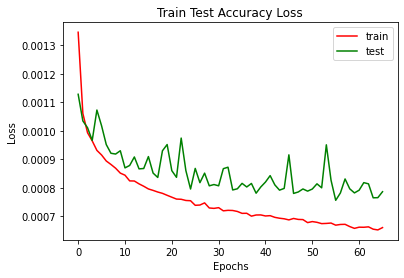

In [103]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='r',label='train')
plt.plot(history.history['val_loss'],color='g',label='test')
plt.title('Train Test Accuracy Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [104]:
def create_model(learning_rate=0.01, activation='relu',nl=1,nn=256,dropout_rate=0.0): 
    model = Sequential()
    model.add(Dense(16, activation = 'relu',
                            input_shape = input_shape))
    model.add(Dense(256, activation = 'relu'))
    #model.add(BatchNormalization())
    model.add(Dense(256, activation = 'relu'))
    #model.add(BatchNormalization())
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mse')
    return model

nn = KerasRegressor(build_fn = create_model,
                       epochs = 61 , batch_size = 64, verbose= 0)

nn.fit(X_train,y_train)

Epoch 1/100
50000/50000 [==============================] - 4s 71us/step - loss: 8.9199e-04
Epoch 2/100
50000/50000 [==============================] - 3s 70us/step - loss: 8.5845e-04
Epoch 3/100
50000/50000 [==============================] - 3s 69us/step - loss: 8.2600e-04
Epoch 4/100
50000/50000 [==============================] - 4s 71us/step - loss: 8.4264e-04
Epoch 5/100
50000/50000 [==============================] - 4s 73us/step - loss: 8.3380e-04
Epoch 6/100
50000/50000 [==============================] - 3s 69us/step - loss: 8.2076e-04
Epoch 7/100
50000/50000 [==============================] - 3s 68us/step - loss: 8.1120e-04
Epoch 8/100
50000/50000 [==============================] - 3s 69us/step - loss: 8.0085e-04
Epoch 9/100
50000/50000 [==============================] - 3s 67us/step - loss: 8.2085e-04
Epoch 10/100
50000/50000 [==============================] - 3s 70us/step - loss: 8.2117e-04
Epoch 11/100
50000/50000 [==============================] - 3s 70us/step - loss: 7.9379e-

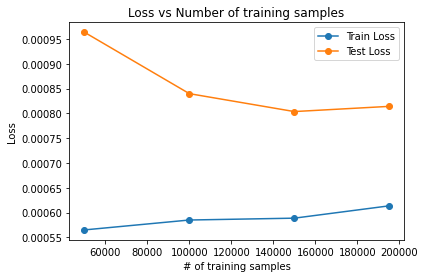

In [ ]:
#Learning curve

initial_weights = model.get_weights()
training_sizes = np.array([50000,100000,150000,195000])

def plot_results(train_accs,test_accs):
  plt.plot(training_sizes, train_accs, 'o-', label="Train Loss")
  plt.plot(training_sizes, test_accs, 'o-', label="Test Loss")
  plt.title('Loss vs Number of training samples')
  plt.xlabel('# of training samples')
  plt.ylabel('Loss')
  plt.legend(loc="best")
  plt.show()

train_accs = []
test_accs = []
for size in training_sizes:

    X_train_frac, y_train_frac = X_train[:size], y_train[:size]

    model.set_weights(initial_weights)
    model.fit(X_train_frac, y_train_frac, epochs = 100, callbacks = [early_stopping])

    train_accs.append(model.evaluate(X_train_frac, y_train_frac))
    test_accs.append(model.evaluate(X_test, y_test))

plot_results(train_accs, test_accs)

In [ ]:
#We need much more training samples for the neural network to learn better

In [105]:
t1 = tss
t2 = tss

In [106]:
t1.iloc[:,:] = mm.inverse_transform(t1)
orig_price = t1['price']

In [107]:
t2['price'] = nn.predict(X_test)
t2.iloc[:,:] = mm.inverse_transform(t2)
pred_price = t2['price']

In [108]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(orig_price,pred_price))

2837.452984274333

In [109]:
# accuracies =  cross_val_score(estimator=nn, X= X_train, y=y_train,cv=10,scoring='neg_mean_squared_error', n_jobs=-1)
# print(f'Mean {np.mean(np.sqrt(np.abs(accuracies)))} \nStd {np.std(np.sqrt(np.abs(accuracies)),ddof=1)}')

In [110]:
y_train = pd.DataFrame(y_train)

In [111]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=10,shuffle=True,random_state=0)
for model,name in zip([nn],['Neural Network']):
    t3 = tss
    rmse = []
    for train_idx,test_idx in kf.split(X_train,y_train):
        X_train1,X_test1 = X_train.iloc[train_idx,:],X_train.iloc[test_idx,:]
        y_train1,y_test1 = y_train.iloc[train_idx,:],y_train.iloc[test_idx,:]
        model.fit(X_train1,y_train1)
        t3['price'] = model.predict(X_test)
        t3.iloc[:,:] = mm.inverse_transform(t3)
        y_pred = t3['price']
        mse = metrics.mean_squared_error(orig_price,y_pred)
        rmse.append(np.sqrt(mse))
    print('RMSE scores : %0.03f (+/- %0.08f) [%s]'%(np.mean(rmse), np.std(rmse,ddof = 1), name))
    print()

RMSE scores : 2839.182 (+/- 45.82048079) [Neural Network]

